<a href="https://colab.research.google.com/github/atikhasan007/Scikit-learn/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('shop data.csv')

In [ ]:
df

,age,income,gender,m_status,Status
0,<25,high,male,single,Bad
1,<25,high,male,married,Bad
2,25-35,high,male,single,Good
3,>35,medium,male,single,Good
4,>35,low,female,single,Good
5,>35,low,female,single,Bad
6,25-35,low,female,married,Good
7,<25,medium,male,married,Bad
8,<25,low,female,single,Good
9,>35,medium,female,married,Good


In [ ]:
x = df.drop('Status', axis=1)

In [ ]:
x

,age,income,gender,m_status
0,<25,high,male,single
1,<25,high,male,married
2,25-35,high,male,single
3,>35,medium,male,single
4,>35,low,female,single
5,>35,low,female,single
6,25-35,low,female,married
7,<25,medium,male,married
8,<25,low,female,single
9,>35,medium,female,married


In [ ]:
#y = df.iloc[:,4]
y = df.Status

In [ ]:
y

0      Bad
1      Bad
2     Good
3     Good
4     Good
5      Bad
6     Good
7      Bad
8     Good
9     Good
10    Good
11    Good
12    Good
13     Bad
14     Bad
15    Good
16    Good
17    Good
18    Good
19    Good
20     Bad
21    Good
Name: Status, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_x = LabelEncoder()
x = x.apply(le_x.fit_transform)

In [ ]:
x

,age,income,gender,m_status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,1
6,0,1,0,0
7,1,2,1,0
8,1,1,0,1
9,2,2,0,0


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30, random_state=2)

In [ ]:
xtrain

,age,income,gender,m_status
10,1,2,0,1
9,2,2,0,0
4,2,1,0,1
5,2,1,0,1
16,2,2,1,0
1,1,0,1,0
2,0,0,1,1
7,1,2,1,0
18,0,2,0,0
17,1,0,0,1


In [ ]:
xtest

,age,income,gender,m_status
12,0,0,0,1
0,1,0,1,1
14,1,0,1,1
6,0,1,0,0
19,0,0,1,1
20,2,2,0,0
3,2,2,1,1


In [ ]:
ytest

12    Good
0      Bad
14     Bad
6     Good
19    Good
20     Bad
3     Good
Name: Status, dtype: object

In [ ]:
ytrain

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dect = DecisionTreeClassifier()
dect.fit(xtrain, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
dect.predict(xtest)

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good'],
      dtype=object)

In [ ]:
ytest

12    Good
0      Bad
14     Bad
6     Good
19    Good
20     Bad
3     Good
Name: Status, dtype: object

In [ ]:
dect.score(xtest, ytest)

0.5714285714285714

**Performance using cross_val_score**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
result = cross_val_score(DecisionTreeClassifier(), x, y, cv=5)
result

array([0.6 , 0.6 , 0.75, 0.25, 0.5 ])

In [ ]:
result.mean()

0.54

In [ ]:
from sklearn.linear_model import LogisticRegression
result = cross_val_score(LogisticRegression(), x, y, cv=5)
result

array([0.4 , 0.6 , 0.75, 0.5 , 0.75])

In [ ]:
result.mean()

0.6

In [ ]:
from sklearn.preprocessing import MinMaxScaler

MMS = MinMaxScaler()

x_scaled = MMS.fit_transform(x)
x_scaled

array([[0.5, 0. , 1. , 1. ],
       [0.5, 0. , 1. , 0. ],
       [0. , 0. , 1. , 1. ],
       [1. , 1. , 1. , 1. ],
       [1. , 0.5, 0. , 1. ],
       [1. , 0.5, 0. , 1. ],
       [0. , 0.5, 0. , 0. ],
       [0.5, 1. , 1. , 0. ],
       [0.5, 0.5, 0. , 1. ],
       [1. , 1. , 0. , 0. ],
       [0.5, 1. , 0. , 1. ],
       [0. , 1. , 1. , 0. ],
       [0. , 0. , 0. , 1. ],
       [1. , 1. , 1. , 0. ],
       [0.5, 0. , 1. , 1. ],
       [0.5, 0. , 0. , 0. ],
       [1. , 1. , 1. , 0. ],
       [0.5, 0. , 0. , 1. ],
       [0. , 1. , 0. , 0. ],
       [0. , 0. , 1. , 1. ],
       [1. , 1. , 0. , 0. ],
       [0.5, 0.5, 1. , 1. ]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
result = cross_val_score(KNeighborsClassifier(n_neighbors=3), x_scaled, y, cv=5)
result

array([0.8 , 0.4 , 0.75, 0.5 , 0.25])

In [ ]:
result.mean()

0.54

In [ ]:
xtest.iloc[6:,:]

,age,income,gender,m_status
3,2,2,1,1


In [ ]:
aa = dect.predict([[2,2,1,1]])
aa

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Good'], dtype=object)

In [ ]:
y_predict = dect.predict(xtest)
y_predict

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good'],
      dtype=object)

In [ ]:
ytest

12    Good
0      Bad
14     Bad
6     Good
19    Good
20     Bad
3     Good
Name: Status, dtype: object

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
cm = confusion_matrix(ytest,y_predict)
cm

array([[0, 3],
       [0, 4]], dtype=int64)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Bad', 'Good']) #[True, False]
cm_display

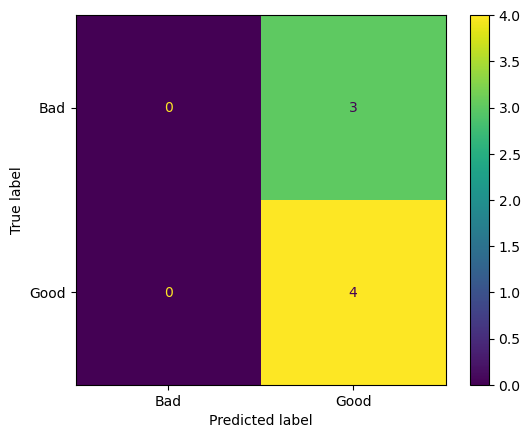

In [ ]:
cm_display.plot()

In [ ]:
metrics.accuracy_score(ytest,y_predict)

0.5714285714285714

In [ ]:
metrics.precision_score(ytest,y_predict, average=None)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


array([0.        , 0.57142857])

In [ ]:
metrics.recall_score(ytest,y_predict, average=None)

array([0., 1.])

In [ ]:
metrics.f1_score(ytest,y_predict, average=None)

array([0.        , 0.72727273])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00         3
        Good       0.57      1.00      0.73         4

    accuracy                           0.57         7
   macro avg       0.29      0.50      0.36         7
weighted avg       0.33      0.57      0.42         7



C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [ ]:
#xinput = np.array([1,0,0,1])
xinput = np.array([1,0,1,1])

In [ ]:
y_predict = dect.predict([xinput])

In [ ]:
y_predict